# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [1]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [3]:
df_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [4]:
print(len(df_data))
print(len(df_data.columns))

150
4


1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [7]:
print(df_data.mean())
print(df_data.count())
print(df_data.std())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


1.4. `df_data` に欠損値がないかを確認しましょう。

In [9]:
df_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [11]:
df_target.sample(n=10)

,target
56,1
21,0
94,1
45,0
27,0
59,1
10,0
85,1
37,0
120,2


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

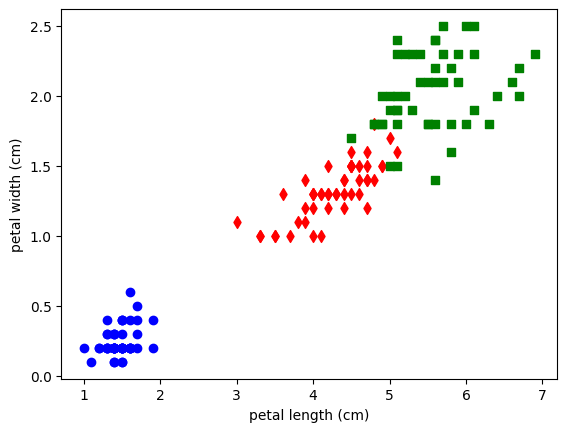

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = (df_data[['petal length (cm)','petal width (cm)']])
z = df_target
df = pd.concat([df, z], axis=1)

df0 = df[df['target'] == 0]
x0 = df0['petal length (cm)']
y0 = df0['petal width (cm)']

df1 = df[df['target'] == 1]
x1 = df1 ['petal length (cm)']
y1 = df1 ['petal width (cm)']

df2 = df[df['target'] == 2]
x2 = df2['petal length (cm)']
y2 = df2['petal width (cm)']

plt.scatter(x0, y0, color='blue', marker='o' , alpha=1)
plt.scatter(x1, y1, color='red', marker='d', alpha=1)
plt.scatter(x2, y2, color='green', marker=',', alpha=1)

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y , test_size=0.2)

4.2. 本当に4:1に分割できているか確認しましょう。

In [31]:
a=len(x_train)/len(x_test)
b=len(y_train)/len(y_test)
print(a,b)


4.0 4.0


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [41]:
model.predict(x_test[:1])

array([1])

6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [39]:
score = model.score(x_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 1.0


実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。